In [104]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import missingno as msno
import calendar
from datetime import datetime

In [105]:
#change the working directory

os.chdir(r"C:\Users\SAMARNA\Documents\Learning\ml_case_studies")

In [106]:
#read the csv file into a dataframe

bike_data = pd.read_csv("datasets/Bike-Sharing-Dataset/hour.csv")

In [107]:
#display the first 5 rows of the dataframe

bike_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [108]:
#describe the data

bike_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [109]:
#create a copy of data for exploration

bike_data_copy = bike_data.copy(deep = True)

In [110]:
#modifying data by creating season map and weather maps

seasonMap = {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}

weatherMap = {1: "Clear + Few clouds + Partly cloudy + Partly cloudy",
             2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
             3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
             4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

bike_data_copy["date"] = bike_data_copy["dteday"].apply(lambda x: x.split()[0])
bike_data_copy["weekday"] = bike_data_copy["date"].apply(lambda dateString: 
                                            calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
bike_data_copy["season"] = bike_data_copy["season"].map(seasonMap)
bike_data_copy["weathersit"] = bike_data_copy["weathersit"].map(weatherMap)

Text(0.5, 1.0, 'Count / Season Distribution')

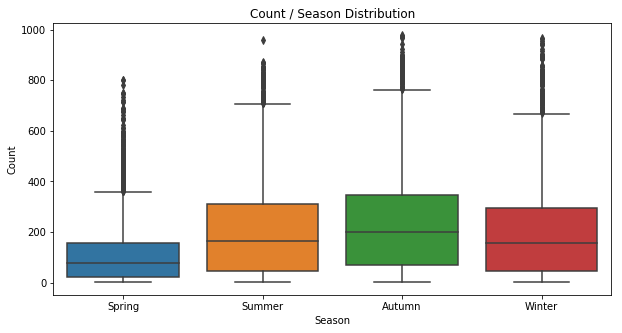

In [111]:
#plot the box plot distribution of Count per Season

plt.figure(figsize=(10, 5))
sns.boxplot(x = "season", y = "cnt", data = bike_data_copy)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count / Season Distribution")

Text(0.5, 1.0, 'Count / Hour Distribution')

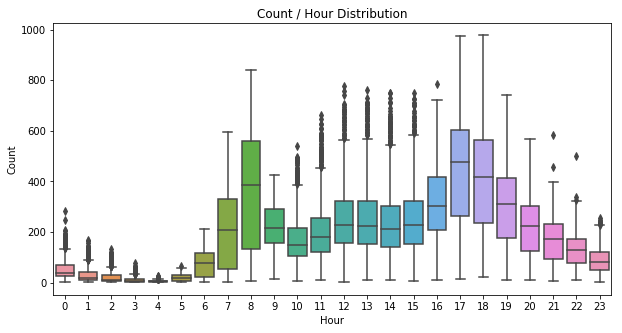

In [112]:
#plot the box plot distribution of Count per Hour

plt.figure(figsize=(10, 5))
sns.boxplot(x = "hr", y = "cnt", data = bike_data_copy)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count / Hour Distribution")

Text(0.5, 1.0, 'Count / Month Distribution')

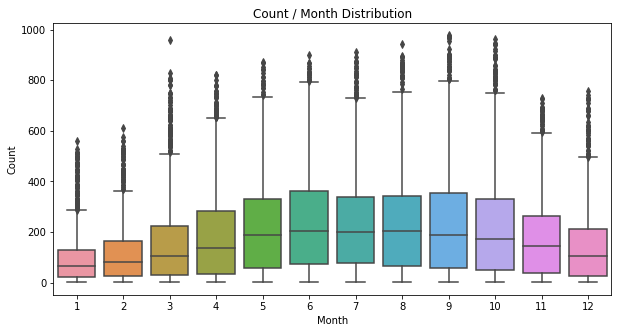

In [113]:
#plot the box plot distribution of Count per Month

plt.figure(figsize=(10, 5))
sns.boxplot(x = "mnth", y = "cnt", data = bike_data_copy)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count / Month Distribution")

In [114]:
#clean the data and do feature selection

categoryVariableList = ["hr", "yr", "mnth", "weekday", "season", "weathersit", "workingday", "holiday"]
numericalVariableList = ["temp", "hum", "atemp", "windspeed"]
dropVariableList = ["casual", "cnt", "dteday", "date", "registered"]

for var in categoryVariableList:
    bike_data[var] = bike_data[var].astype("category")
    
bike_data["date"] = bike_data["dteday"].apply(lambda x: x.split()[0])
#bike_data["weekday"] = bike_data_copy["date"].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [115]:
#create a correlation matrix to find the measures with correlation

correlation_matrix = bike_data[numericalVariableList].corr(method = "pearson")

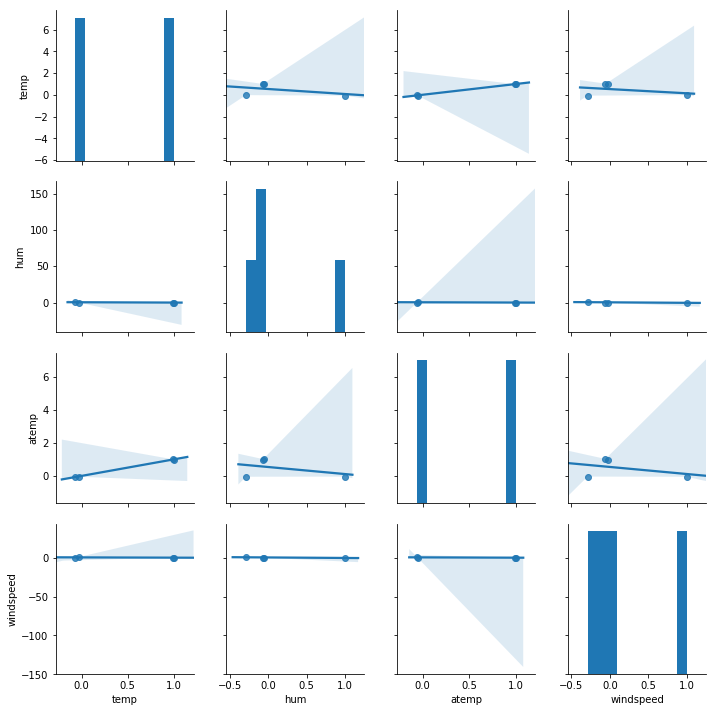

In [116]:
#A seaborn pairplot can be used to display the correlation matrix correlations

sns.pairplot(correlation_matrix, vars = correlation_matrix.columns, kind = "reg")

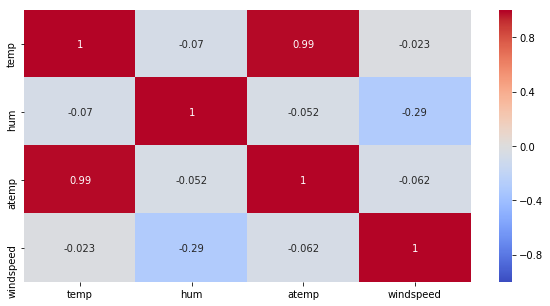

In [117]:
#heatmap can also be used to plot the data with correlation matrix

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, vmin = -1.0, vmax = 1.0, annot = True,  cmap = "coolwarm")

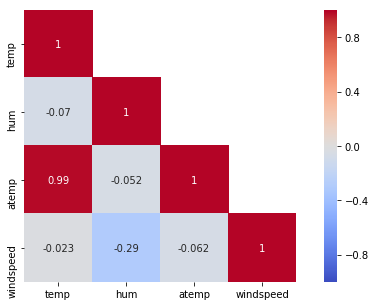

In [118]:
#the elements above the diagonal can be masked as they contain repeating values

mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, mask = mask, vmin = -1, vmax = 1, square = True, annot = True, cmap = "coolwarm")

In [119]:
#data is cleaned, remove null values from the "cnt" target field

clean_bike_data = bike_data[pd.notnull(bike_data["cnt"])].sort_values(by=["dteday"])
target = clean_bike_data["cnt"]

clean_bike_data = clean_bike_data.drop(dropVariableList, axis = 1)

In [120]:
#split the data into train and test portions

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_bike_data, target, test_size = 0.3, random_state = 1)

x_train.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
16410,16411,4,1,11,12,0,3,1,1,0.44,0.4394,0.41,0.1940
6956,6957,4,0,10,11,0,6,0,2,0.44,0.4394,0.62,0.1045
9094,9095,1,1,1,20,0,4,1,1,0.26,0.2121,0.52,0.4478
5399,5400,3,0,8,21,0,3,1,1,0.72,0.6818,0.62,0.2239
11348,11349,2,1,4,1,0,1,1,3,0.34,0.3030,0.87,0.3582


In [121]:
#Random Forest Regressor is used as model

from sklearn.ensemble import RandomForestRegressor

rffModel = RandomForestRegressor(n_estimators=500)

rffModel.fit(x_train, y_train)

y_preds = rffModel.predict(x_test)

In [122]:
#evaluate the model using root mean squared log error and r2 score

from sklearn.metrics import mean_squared_log_error, r2_score

print("Mean squared logarithmic error is: {0}".format(np.sqrt(mean_squared_log_error(y_test, y_preds))))
print("R2 Score: {0}".format(r2_score(y_test, y_preds)))

Mean squared logarithmic error is: 0.3366395860237909
R2 Score: 0.9494524366507855


Text(0.5, 1.0, 'Most important features in the model')

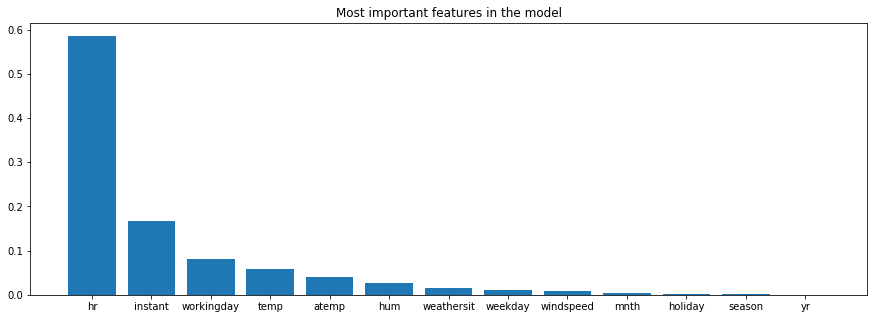

In [123]:
#plot the features in the order of importance

features = pd.DataFrame()

features["features"] = x_train.columns
features["importance"] = rffModel.feature_importances_
features.sort_values(by = "importance", ascending = False, inplace = True)
plt.figure(figsize=(15, 5))
plt.bar(features["features"], features["importance"])
plt.title("Most important features in the model")